This notebook walks the user through building a video2vision operator to convert the linearized camera values to animal sensory impressions. It uses the FReD database of flower reflectances. Due to license issues, we cannot include this database in the electronic supplemental material, but it is available from the original source:

http://www.reflectance.co.uk/

In [1]:
import matplotlib.pyplot as plot
import numpy as np

import v2v_nb 

sense_converter = camera_sense = animal_sense = metrics = None

config = v2v_nb.get_config(clear=True)
v2v_nb.ConfigBox('camera_path', 'animal_sensitivity_path', 'reflectivity_path', 'save_converter_path')

ConfigBox(children=(PathBox(children=(Label(value='Camera Sensitivities Path'), HBox(children=(Text(value='', …

The converter is a simple linear map:
$$
\mbox{animal}_i = \sum_j M_{ij} \mbox{camera}_j
$$
We calculate the linear map by fitting it to the FReD database of flower reflectances:

In [2]:
camera_sense, animal_sense, metrics = v2v_nb.build_and_save_sense_converter()

Done!


Let's visualize the sensitivities of the camera and the animal:

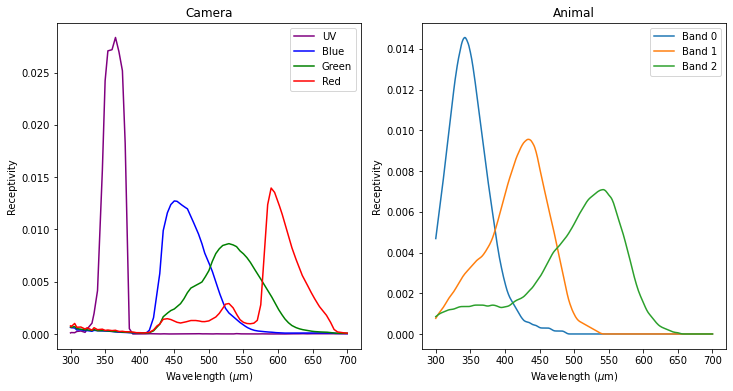

In [3]:
if (camera_sense is None) != (animal_sense is None):
    raise RuntimeError(f'Mismatch in camera_sense {camera_sense}, animal_sense {animal_sense}')
if camera_sense is None:
    print('Please build sensor converter first.')
else:
    plot.figure(figsize=(12, 6))
    
    plot.subplot(1, 2, 1)
    for band, band_name in enumerate(['UV', 'Blue', 'Green', 'Red']):
        color = (band_name[0].lower() if band_name != 'UV' else 'purple')
        plot.plot(
            np.arange(300, 701),
            camera_sense[:, band],
            color=color,
            label=band_name,
        )
    plot.xlabel('Wavelength ($\mu$m)')
    plot.ylabel('Receptivity')
    plot.title('Camera')
    plot.legend()
    
    plot.subplot(1, 2, 2)
    for band in range(animal_sense.shape[1]):
        plot.plot(
            np.arange(300, 701),
            animal_sense[:, band],
            label=f'Band {band}',
        )
    plot.xlabel('Wavelength ($\mu$m)')
    plot.ylabel('Receptivity')
    plot.title('Animal')
    plot.legend()
    
    plot.show()

And let's look at the error of the conversion on a withheld set of 250 reflectances:

In [4]:
print(metrics)

  Band         MAE        R2
------  ----------  --------
     0  0.00662121  0.959106
     1  0.00968227  0.984159
     2  0.00158205  0.999706
